In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

# Load the dataset with 5 features
file_path = r'E:\Bearings\Implementations\top_5_features_rfe.xlsx'
data = pd.read_excel(file_path)

# Split features (X) and labels (y)
X = data.iloc[:, :-1]  # 5 features
y = data.iloc[:, -1]   # Output labels (4 classes)

# Step 1: Train-Validation-Test split (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Step 2: Define the classifiers including additional classifiers with tuned hyperparameters
classifiers = {
    'Tuned Random Forest': RandomForestClassifier(n_estimators=200, max_depth=20),  # Tuned parameters
    'Fine Tree': DecisionTreeClassifier(max_depth=100),
    'Medium Tree': DecisionTreeClassifier(max_depth=20),
    'Coarse Tree': DecisionTreeClassifier(max_depth=4),
    'Linear Discriminant': LinearDiscriminantAnalysis(),
    'Quadratic Discriminant': QuadraticDiscriminantAnalysis(),
    'Gaussian Naive Bayes': GaussianNB(),
    'Tuned SVM (RBF)': SVC(kernel='rbf', C=1, gamma=1),  # Tuned parameters
    'Quadratic SVM': SVC(kernel='poly', degree=2, C=1),
    'Cubic SVM': SVC(kernel='poly', degree=3, C=1),
    'Fine Gaussian SVM': SVC(kernel='rbf', gamma=0.75, C=1),
    'Medium Gaussian SVM': SVC(kernel='rbf', gamma=0.3, C=1),
    'Coarse Gaussian SVM': SVC(kernel='rbf', gamma=0.1, C=1),
    'Fine KNN': KNeighborsClassifier(n_neighbors=1),
    'Medium KNN': KNeighborsClassifier(n_neighbors=10),
    'Weighted KNN': KNeighborsClassifier(n_neighbors=10, weights='distance'),
    'Ensemble Bagged Tree': BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50),
    'Ensemble Subspace Discriminant': BaggingClassifier(estimator=LinearDiscriminantAnalysis(), n_estimators=50),
    'Ensemble Subspace KNN': BaggingClassifier(estimator=KNeighborsClassifier(n_neighbors=10), n_estimators=50),
    'Narrow NN': MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000, learning_rate_init=0.001),  # Increased max_iter
    'Medium NN': MLPClassifier(hidden_layer_sizes=(50,), max_iter=1000, learning_rate_init=0.001),
    'Wide NN': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, learning_rate_init=0.001),
    'Bilayered NN': MLPClassifier(hidden_layer_sizes=(50, 50), max_iter=1000, learning_rate_init=0.001),
    'Trilayered NN': MLPClassifier(hidden_layer_sizes=(50, 50, 50), max_iter=1000, learning_rate_init=0.001)
}

# Step 3: Train, validate, and test each model
results = {}

for name, clf in classifiers.items():
    # Train
    clf.fit(X_train, y_train)
    
    # Validate
    y_val_pred = clf.predict(X_val)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Test
    y_test_pred = clf.predict(X_test)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results[name] = {
        'Validation Accuracy': val_accuracy * 100,
        'Test Accuracy': test_accuracy * 100
    }

# Convert results to a DataFrame
results_df = pd.DataFrame(results).T
results_df = results_df[['Validation Accuracy', 'Test Accuracy']]  # Reorder columns

# Print the results in the format you provided
print("Classifier                            Validation Accuracy    Test Accuracy")
for model_name, result in results_df.iterrows():
    print(f"{model_name:35} {result['Validation Accuracy']:.6f}      {result['Test Accuracy']:.6f}")

# Optional: Save the results to a CSV file
results_df.to_csv('classification_results_with_tuned_models.csv', index=True)


Classifier                            Validation Accuracy    Test Accuracy
Tuned Random Forest                 96.097561      97.572816
Fine Tree                           93.170732      94.174757
Medium Tree                         90.243902      93.689320
Coarse Tree                         91.219512      94.660194
Linear Discriminant                 94.146341      94.660194
Quadratic Discriminant              96.585366      96.601942
Gaussian Naive Bayes                94.146341      97.572816
Tuned SVM (RBF)                     96.585366      97.572816
Quadratic SVM                       81.951220      80.582524
Cubic SVM                           94.146341      96.601942
Fine Gaussian SVM                   96.585366      97.572816
Medium Gaussian SVM                 96.097561      98.543689
Coarse Gaussian SVM                 97.073171      96.601942
Fine KNN                            93.658537      96.116505
Medium KNN                          96.097561      98.058252
Weighted K

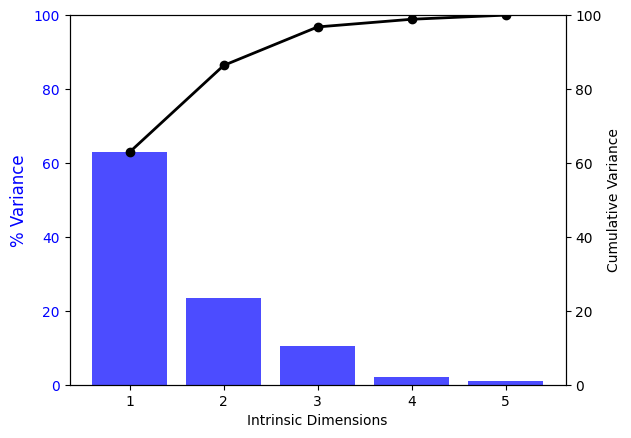

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Assume X_train is your training data with features (before PCA)
# Perform PCA
pca = PCA(n_components=5)  # We assume 5 components as in the image
pca.fit(X_train)

# Calculate explained variance ratio and cumulative variance
explained_variance = pca.explained_variance_ratio_ * 100  # Convert to percentage
cumulative_variance = np.cumsum(explained_variance)

# Create the figure and the first bar plot
fig, ax1 = plt.subplots()

# Bar plot for explained variance (primary y-axis)
ax1.bar(range(1, 6), explained_variance, align='center', alpha=0.7, color='blue')
ax1.set_xlabel('Intrinsic Dimensions', fontsize=10)
ax1.set_ylabel('% Variance', fontsize=12, color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.set_ylim([0, 100])

# Create the second y-axis for the cumulative variance
ax2 = ax1.twinx()
ax2.plot(range(1, 6), cumulative_variance, color='black', marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Cumulative Variance', fontsize=10, color='black')
ax2.tick_params(axis='y', labelcolor='black')
ax2.set_ylim([0, 100])

# Set the title
#plt.title('PCA Explained and Cumulative Variance', fontsize=14)

# Show plot
plt.show()


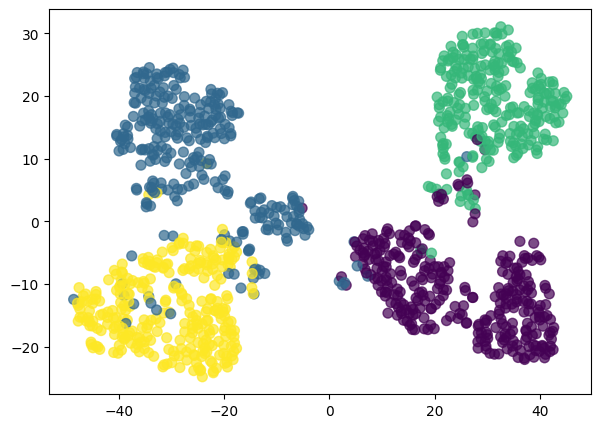

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from mpl_toolkits.mplot3d import Axes3D

# Combine training and test data for the entire feature set
# Assuming X_train, X_test, y_train, y_test are already defined
X_all = np.concatenate([X_train, X_test], axis=0)
y_all = np.concatenate([y_train, y_test], axis=0)

# Perform t-SNE to reduce the entire feature set to 2 dimensions
tsne_2d = TSNE(n_components=2, random_state=42)
X_tsne_2d = tsne_2d.fit_transform(X_all)

# Perform t-SNE to reduce the entire feature set to 3 dimensions
tsne_3d = TSNE(n_components=3, random_state=42)
X_tsne_3d = tsne_3d.fit_transform(X_all)

# Plot t-SNE in 2D
plt.figure(figsize=(7, 5))
plt.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1], c=y_all, cmap='viridis', s=50, alpha=0.7)
plt.show()




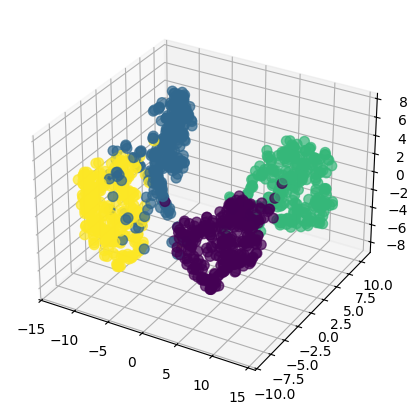

In [20]:
# Plot t-SNE in 3D
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot for the 3D t-SNE result
scatter = ax.scatter(X_tsne_3d[:, 0], X_tsne_3d[:, 1], X_tsne_3d[:, 2], 
                     c=y_all, cmap='viridis', s=50, alpha=0.7)

# Add labels and title


# Add colorbar
plt.show()

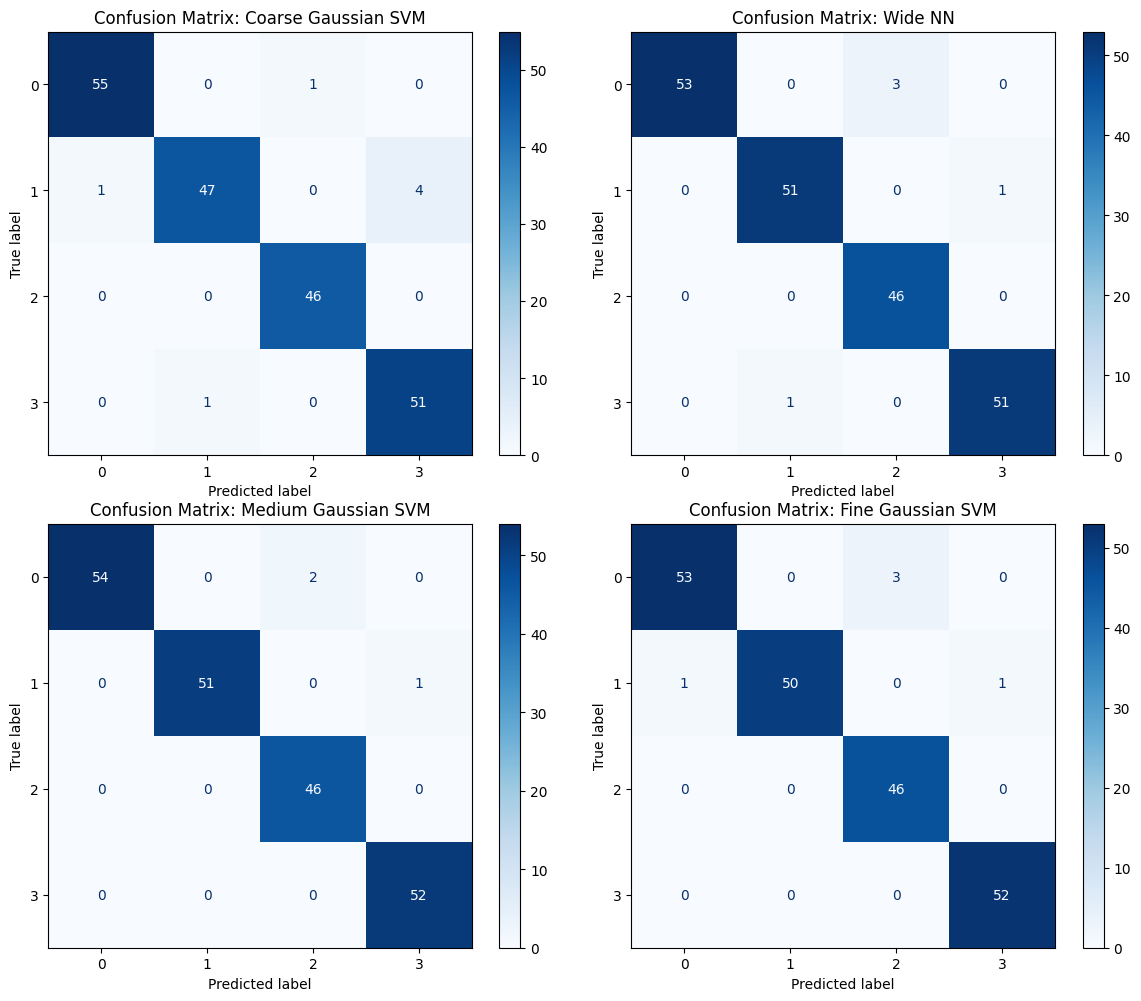

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

# Load the dataset with 5 features
file_path = r'E:\Bearings\Implementations\top_5_features_rfe.xlsx'
data = pd.read_excel(file_path)

# Split features (X) and labels (y)
X = data.iloc[:, :-1]  # 5 features
y = data.iloc[:, -1]   # Output labels (4 classes)

# Step 1: Train-Validation-Test split (70%-15%-15%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.30, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

# Define the four classifiers with tuned hyperparameters
models = {
    'Coarse Gaussian SVM': SVC(kernel='rbf', gamma=0.1, C=1),
    'Wide NN': MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, learning_rate_init=0.001),
    'Medium Gaussian SVM': SVC(kernel='rbf', gamma=0.3, C=1),
    'Fine Gaussian SVM': SVC(kernel='rbf', gamma=0.75, C=1)
}

# Train, predict, and plot confusion matrices for each model
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2x2 grid for the confusion matrices
axes = axes.ravel()  # Flatten the axes array for easier indexing

for i, (name, model) in enumerate(models.items()):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on the test data
    y_pred = model.predict(X_test)
    
    # Calculate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    
    # Plot the confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[i], cmap='Blues')
    axes[i].set_title(f"Confusion Matrix: {name}")

# Show the plots
plt.tight_layout()
plt.show()
